In [53]:
!conda activate openai

In [148]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import sys
import pandas as pd
import numpy as np
import skimage.io
import tifffile

from tqdm import tqdm
from collections import OrderedDict
from sklearn.neighbors import KDTree

sys.setrecursionlimit(10000)

## TIF images

In [58]:
SRC_PATH_PATTERN = '../../../data/tiles/*.tif'
DATA_DIR='../../../data/tiles/'

SIZE = 5000

In [56]:
DATA_DIR = '../../../data/18/18/'
SIZE = 256

In [59]:
ids = os.listdir(DATA_DIR)#[::-4]
ids = list(set([s[:-4] for s in ids])) # list unique ids
ids[:5]

['MGFullHigh_transparent_mosaic_group1_10_9',
 'MGFullHigh_transparent_mosaic_group1_2_3',
 'MGFullHigh_transparent_mosaic_group1_4_3',
 'MGFullHigh_transparent_mosaic_group1_6_1',
 'MGFullHigh_transparent_mosaic_group1_8_4']

### Helper functions

In [182]:
def read_image(image_path):
    """Helper, reads tif RGBA image to 3 channels"""
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)     
    return image


def _read_img(image_path):
    """Helper, reads tif RGBA image to 4 channels"""
    img = skimage.io.imread(image_path, plugin='tifffile')
    #img = img[:, :, :3]
    return img

In [183]:
x, y = 4, 4

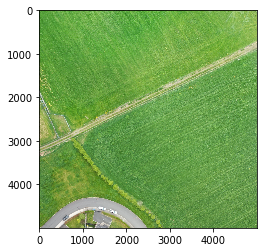

In [184]:
file_name = f'MGFullHigh_transparent_mosaic_group1_{x}_{y}.tif'
image_path = os.path.join(DATA_DIR, file_name)
image = read_image(image_path)
plt.imshow(image)

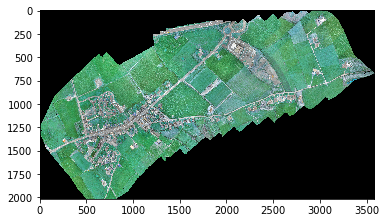

In [185]:
image_path = f'{SAVE_PATH}full_224.tif'
image = read_image(image_path)
plt.imshow(image)

In [186]:
image.shape

(2016, 3584, 3)

In [115]:
img_size = 1024

In [118]:
i = 0
for y in range(1, 10):
    file_name = f'MGFullHigh_transparent_mosaic_group1_{x}_{y}.tif'
    image_path = os.path.join(DATA_DIR, file_name)
    img = read_image(image_path)
    img = cv2.resize(img, (img_size, img_size))    
    if i == 0:
        im_v = img
        i += 1
    else:
        im_v = cv2.vconcat([im_v, img]) 
        print(im_v.shape)

(2048, 1024, 3)
(3072, 1024, 3)
(4096, 1024, 3)
(5120, 1024, 3)
(6144, 1024, 3)
(7168, 1024, 3)
(8192, 1024, 3)
(9216, 1024, 3)


## Combine tiles

In [187]:
def stitch_verticals(x: int, img_size: int = 1024, image_dir: str = DATA_DIR):
    """Helper to stitch verticals"""
    i = 0
    for y in range(1, 10):
        file_name = f'MGFullHigh_transparent_mosaic_group1_{x}_{y}.tif'
        image_path = os.path.join(DATA_DIR, file_name)
        img = read_image(image_path)
        img = cv2.resize(img, (img_size, img_size))    
        if i == 0:
            im_v = img
            i += 1
        else:
            im_v = cv2.vconcat([im_v, img]) 
            #print(im_v.shape)
            
    return im_v 


def combine_image(img_size: int = 1024, image_dir: str = DATA_DIR):
    """
    Combine tif tiles both vertical and horizontal
    """
    i = 0
    for x in range(1, 17):
        img = stitch_verticals(x, img_size, image_dir)   
        if i == 0:
            im_v = img
            i += 1
        else:
            im_v = cv2.hconcat([im_v, img])
        #print(im_v.shape)
    
    return im_v   

In [188]:
def test_stitch_verticals():
    """Test verticals stitched images"""
    im_v = stitch_verticals(5, 224)
    plt.figure(figsize=(12,12))
    plt.imshow(im_v) 
    plt.show() 

def test_combine_image():
    """Test fully stitched images"""
    img_full = combine_image(224)
    plt.figure(figsize=(12,12)) 
    plt.imshow(img_full) 
    plt.show()   

## Do mosaic and save

In [189]:
SAVE_PATH = '../../../data/full/'

In [190]:
import tifffile

In [191]:
img_full = combine_image(2048)
tifffile.imsave(f'{SAVE_PATH}full_2048.tif', img_full)

# Check combined

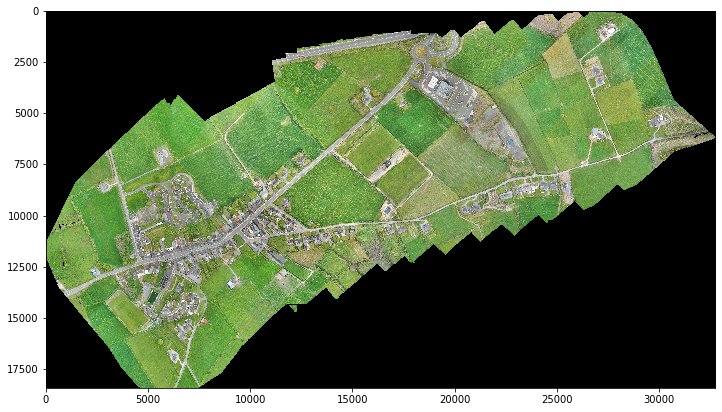

In [194]:
plt.figure(figsize=(12,12)) 
plt.imshow(img_full) 
plt.show()

In [193]:
image_path = f'{SAVE_PATH}full_2048.tif'
image = read_image(image_path)
plt.figure(figsize=(12,12)) 
plt.imshow(image)

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


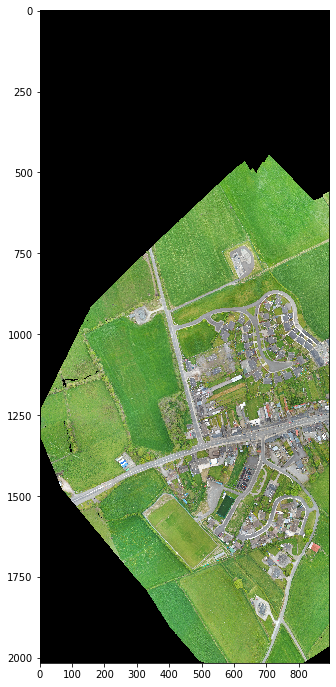

In [138]:
plt.figure(figsize=(12,12)) 
plt.imshow(img_full) 
plt.show() 

In [107]:
SIZE = 5000
image = np.zeros(shape=(4*SIZE, 4*SIZE, 3), dtype=np.int8)   
size = SIZE

In [111]:
x0, y0 = 2, 1
for x in range(x0, x0+4):
    for y in range(y0, y0+4):
        file_name = f'MGFullHigh_transparent_mosaic_group1_{x}_{y}.tif'        
        image_path = os.path.join(DATA_DIR, file_name)
        img = read_image(image_path)
        img.shape            
        image[(y-y0)*size:(y-y0+1)*size, (x-x0)*size:(x-x0+1)*size, :] = img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


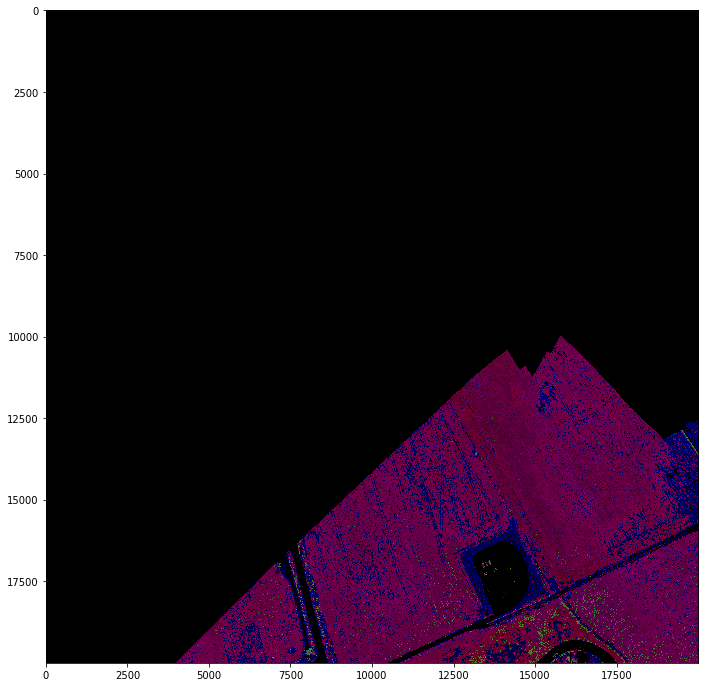

In [112]:
plt.figure(figsize=(12,12))
plt.imshow(image) 
plt.show() 

## PNG images

In [ ]:
x_min, x_max = 85046, 85088
y_min, y_max = 124548, 124592
img_full = np.zeros(shape=((x_max - x_min)*SIZE, (y_max - y_min)*SIZE, 3), dtype=np.int8)

y0 = str(124592)
ids = tiles_y_x[y0]

In [48]:
images_dir='../../../data/openai/interim/test/000e6e/'

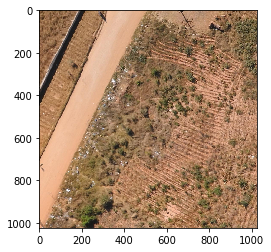

In [49]:
image_path = os.path.join(images_dir, '000e6e.tif')
image = read_png_image(image_path)
plt.imshow(image)

In [50]:
image.shape

(1024, 1024, 3)

In [51]:
def read_image(path):
    """Read raster image from specified path (only 3 channles)"""
    with rasterio.open(path) as src:
        return src.read()[:3].transpose(1, 2, 0)
    
    
def read_borders(path):
    """Read 1-pixel borders from images (flattten to 1D array), 
    retruns Dict[str, np.ndarray]
    """
    with rasterio.open(path) as src:
        left = src.read(window=Window(0, 0, 1, 1024))[:3]
        right = src.read(window=Window(1023, 0, 1, 1024))[:3]
        top = src.read(window=Window(0, 0, 1024, 1))[:3]
        bottom = src.read(window=Window(0, 1023, 1024, 1))[:3]
    return dict(
        left=left.flatten(), 
        right=right.flatten(), 
        top=top.flatten(), 
        bottom=bottom.flatten(),
    )

def read_descriptors(paths):
    """Read image descriptors (borders)"""
    descriptors = OrderedDict()
    
    with tqdm(paths) as p_paths:
        for path in p_paths:
            id = os.path.basename(path)
            descriptor = read_borders(path)
            descriptors[id] = descriptor
    return descriptors

def get_neighbours(x1, x2, threshold=0.45):
    """Extract two nearest neigbours for each side of image, 
    if [distance to first]/[distance to second] < threshold assume that we find matching image"""
    x2_kd = KDTree(x2)
    distances, keys = x2_kd.query(x1, k=2)
    distances_rel = (distances[:, 0] + 0.0001) / (distances[:, 1] + 0.0001)
    keys = keys[:, 0]
    keys[distances_rel > threshold] = -1
    return keys

def check_validity(x1, x2):
    """Check neighbours validity, check that left neighbour for image right image is the same 
    as right nighbour for left image"""
    x1 = x1.copy()
    x2 = x2.copy()
    
    for i, k1 in enumerate(x1):
        if k1 != -1:
            j = x2[k1]
            if j == -1:
                x1[i] = -1
                
    for i, k1 in enumerate(x2):
        if k1 != -1:
            j = x1[k1]
            if j == -1:
                x2[i] = -1
            
    return x1, x2

def make_cluster(cluster, nb, k, visited, pos):
    """Create clusters of images accoring to its nearest neighbours"""
    cluster[k] = pos
    visited.add(k)
    node = nb[k]
    for _pos, connection in node.items():
        if connection not in visited and connection != -1:
            x, y = pos
            if _pos == 'left':
                x = x - 1
            if _pos == 'right':
                x = x + 1
            if _pos == 'top':
                y = y - 1
            if _pos == 'bottom':
                y = y + 1
            make_cluster(cluster, nb, connection, visited, pos=(x, y))
    
def normalize_cluster(cluster):
    """Looking for min X and min Y position values in cluster
    and shift them to make cluster position started from (0, 0)"""
    xs = [c[0] for c in cluster.values()]
    ys = [c[1] for c in cluster.values()]

    min_x = min(xs)
    min_y = min(ys)
    
    cluster_ = {}
    for k, v in cluster.items():
        cluster_[k] = (v[0] - min_x, v[1] - min_y)
    return cluster_

def get_xy_max(cluster):
    """Looking for max X nd Y positions in cluster"""
    xs = [c[0] for c in cluster.values()]
    ys = [c[1] for c in cluster.values()]
    return max(xs), max(ys)

def reverse_cluster(cluster):
    """Reverse clusters keys and values (encode name: poisiton -> position: name)"""
    return {v: k for k, v in cluster.items()}

### Creating mosaic

In [4]:
# reading descriptors
paths = glob.glob(SRC_PATH_PATTERN)
descriptors = read_descriptors(paths)

100%|██████████| 11481/11481 [11:52<00:00, 16.11it/s]


In [5]:
# extract descriptors for each side of image
left_arr = np.array([descriptors[k]["left"] for k in descriptors.keys()])[:, ::8]
right_arr = np.array([descriptors[k]["right"] for k in descriptors.keys()])[:, ::8]
top_arr = np.array([descriptors[k]["top"] for k in descriptors.keys()])[:, ::8]
bottom_arr = np.array([descriptors[k]["bottom"] for k in descriptors.keys()])[:, ::8]

In [6]:
# extarcting nearest negbours for each image according to its border descriptor
# heavy step, may take about 10 minutes
lr_keys = get_neighbours(left_arr, right_arr)
rl_keys = get_neighbours(right_arr, left_arr)
tb_keys = get_neighbours(top_arr, bottom_arr)
bt_keys = get_neighbours(bottom_arr, top_arr)

In [7]:
# check consistency of neighbours
lr_keys_, rl_keys_ = check_validity(lr_keys, rl_keys)
tb_keys_, bt_keys_ = check_validity(tb_keys, bt_keys)

In [8]:
# create neighbours dict
neighbours = {}
for i, k in enumerate(descriptors.keys()):
    neighbours[i] = dict(
        left=lr_keys_[i],
        right=rl_keys_[i],
        top=tb_keys_[i],
        bottom=bt_keys_[i],
    )

In [9]:
# create clusters of groupped images recursively going through neighbours
visited = set()
clusters = []

for i in range(len(paths)):
    if i not in visited:
        cluster = {}
        make_cluster(cluster, neighbours, i, visited, (0, 0))
        clusters.append(cluster)

### Visualization of mosaic (clusters)

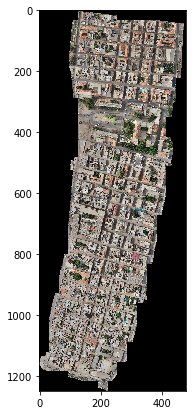

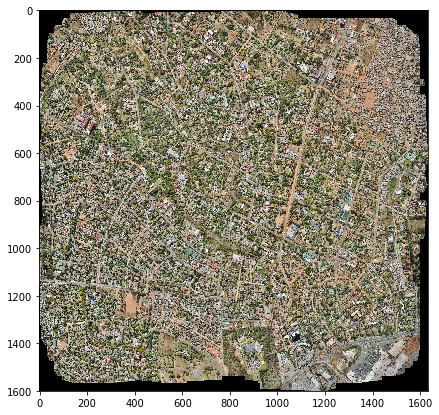

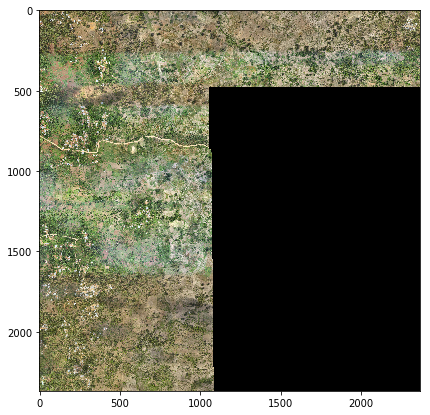

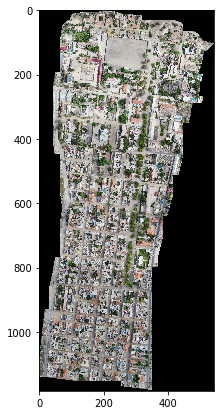

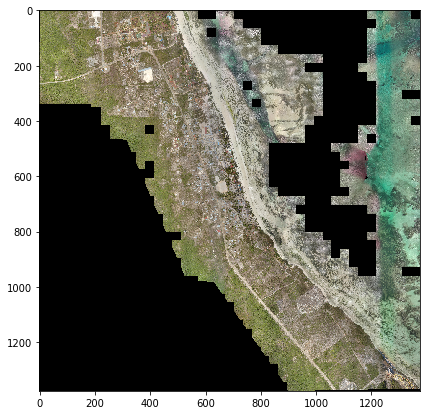

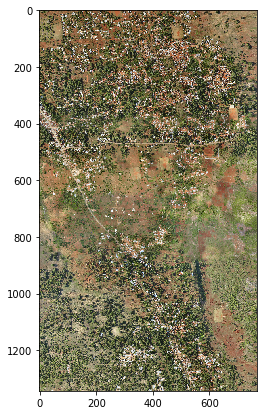

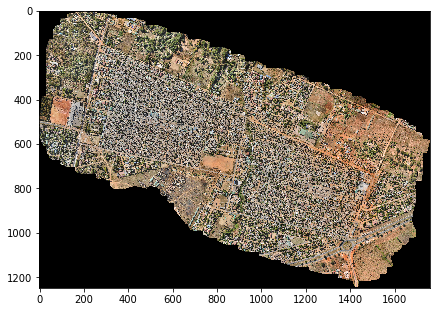

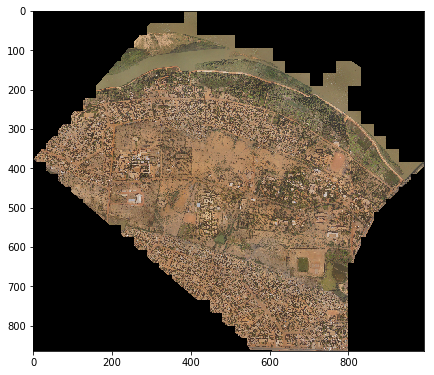

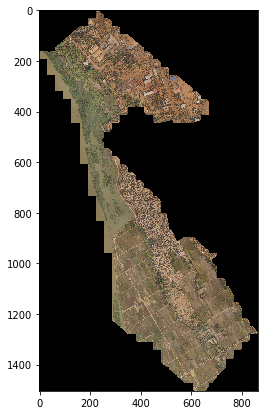

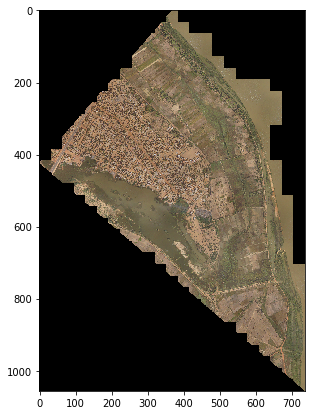

In [10]:
for cluster in clusters:
    if len(cluster.keys()) < 40:  # skip small clusters
        continue
    cluster = normalize_cluster(cluster)
    rev_cluster = reverse_cluster(cluster)

    x_min, y_min = 0, 0
    x_max, y_max = get_xy_max(cluster)

    sparsness = 32
    image = np.zeros(
        (
             1024 * (y_max + 1) // sparsness, 
             1024 * (x_max + 1) // sparsness, 
             3,
        ), dtype='uint8')


    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            try:
                k = rev_cluster[(x, y)]
                tile = read_image(paths[k])[::sparsness, ::sparsness]
                h, w = tile.shape[:2]
                image[h * y : h * (y + 1), w * x : w * (x + 1)] = tile
            except KeyError:
                pass

    plt.figure(figsize=(7, 7))
    plt.imshow(image)
    plt.show()

### Saving results

In [11]:
min_cluster_size = 5  # images
data = []

for i, cluster in enumerate(clusters):
    
    cluster_id = i if len(cluster.keys()) > min_cluster_size else -1
    cluster = normalize_cluster(cluster)  # make each mosaic (cluster of images) starting position (0, 0)

    for n, pos in cluster.items():
        data.append(dict(
            id=os.path.basename(paths[n]),
            cluster_id=cluster_id,
            x=pos[0],
            y=pos[1],
        ))

In [12]:
# Original tile size for test images is 1024 x 1024 pixels, however real spatial 
# resolution is deffernet for different scenes.
# This information present in train geotiff files, however missed in test images.
# So, for some test scenes I have estimated tile size according to public LB results
# to make test imagery resolution closer to 0.1 pixel per pixel
# as it is used during training NN models.

estimated_tile_size = {
    1: 320,
    2: 576,
    4: 320,
    5: 512,
    6: 704,
    7: 512,
}

df["tile_size"] = df.cluster_id.apply(lambda x: estimated_tile_size.get(x, 1024))  # 1024 is default value

In [13]:
df.to_csv(DST_CSV_PATH, index=False)
df.sample(20)

cluster_id          id   x   y  tile_size
10872          10  714845.tif   6   8       1024
429             2  1648ba.tif  21  15        576
3311            3  d33f3d.tif  18   7       1024
3888            3  ba0831.tif  62  14       1024
5016            3  06398d.tif   9  49       1024
3331            3  08a65b.tif  38   7       1024
10694          10  1c54e5.tif   7  18       1024
1933            2  93cba6.tif  31  30        576
1530            2  4fcd97.tif   1  25        576
1297            2  a7f902.tif  49  19        576
8029            6  26a36c.tif   9  27        704
3830            3  7f8d90.tif  22  15       1024
1425            2  b181d3.tif  25  23        576
169             1  c27dcc.tif  10  17        320
493             2  bfe2b2.tif   0  14        576
7053            5  07fe07.tif  12   4        512
944             2  5d9e8f.tif  12   1        576
9328            7  16e39e.tif  35  24        512
6698            5  c2bc1b.tif  42  30        512
5822            3  63354a.tif   7  73       1024